#📌 Extracción

In [70]:
from google.colab import files
# Subir archivo JSON desde tu equipo
uploaded = files.upload()

Saving TelecomX_Data (2).json to TelecomX_Data (2) (1).json


In [71]:
# Ruta del archivo
archivo_json = "TelecomX_Data (2).json"
# Cargar el archivo JSON  # Leer archivo JSON
with open(archivo_json, "r", encoding="utf-8") as f:
    datos = json.load(f)
# Convertir a DataFrame
df = pd.json_normalize(datos)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

# 1-🔁 Renombrar columnas

In [72]:
# Renombrar columnas anidadas a nombres planos
df.columns = df.columns.str.replace(r'\.', '_', regex=True)

# 2-🔄 Convertir columnas numéricas

In [73]:
# Eliminar posibles espacios y convertir a float
import numpy as np

# Reemplazar cadenas vacías por NaN en las columnas numéricas
# Limpiar espacios en blanco y reemplazar strings vacíos o solo espacios por NaN

# Forzar a string antes de limpiar espacios
df['account_Charges_Total'] = df['account_Charges_Total'].astype(str).str.strip().replace('', np.nan)
df['account_Charges_Monthly'] = df['account_Charges_Monthly'].astype(str).str.strip().replace('', np.nan)

# Convertir a float
df['account_Charges_Total'] = df['account_Charges_Total'].astype(float)
df['account_Charges_Monthly'] = df['account_Charges_Monthly'].astype(float)

In [74]:
# Revisar que todo esté bien
df[['account_Charges_Total', 'account_Charges_Monthly']].dtypes
df[['account_Charges_Total', 'account_Charges_Monthly']].isnull().sum()
df.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


# 3-❓ Identificar valores nulos o vacíos

## ✅**Revisar valores nulos (NaN) por columna** **texto en negrita**

In [75]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


## **✅Revisar también si hay strings vacíos ('') en columnas de texto**

In [76]:
# Contar cuántos strings vacíos hay por columna (solo para columnas tipo texto)
for col in df.select_dtypes(include='object'):
    vacios = (df[col].str.strip() == '').sum()
    if vacios > 0:
        print(f"Columna '{col}': {vacios} valores vacíos ('')")


Columna 'Churn': 224 valores vacíos ('')


## **✅ Ver filas con datos faltantes**

In [77]:
df[df.isnull().any(axis=1)].head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN


## 4-🧹 Preparar datos para análisis de churn

🧹 1. Renombrar columnas **anidadas**

In [78]:
df.columns = df.columns.str.replace('.', '_', regex=False)

🔄 2. Limpieza y **conversión de columnas numéricas**

In [79]:
import numpy as np

# Limpiar espacios y convertir a float
df['account_Charges_Total'] = df['account_Charges_Total'].astype(str).str.strip().replace('', np.nan)
df['account_Charges_Monthly'] = df['account_Charges_Monthly'].astype(str).str.strip().replace('', np.nan)

df['account_Charges_Total'] = df['account_Charges_Total'].astype(float)
df['account_Charges_Monthly'] = df['account_Charges_Monthly'].astype(float)


🧪 3. Revisión de valores **nulos**

In [80]:
# Mostrar columnas con valores nulos
print(df.isnull().sum()[df.isnull().sum() > 0])

account_Charges_Total    11
dtype: int64


eliminar filas con datos faltantes:

In [81]:
df = df.dropna()

🔁 4. Conversión de variables categóricas

Convertir Churn a binaria (Yes = 1, No = 0):

In [82]:
df['Churn'] = df['Churn'].replace('', np.nan)  # vacíos a NaN
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

<ipython-input-82-3242536569>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].replace('', np.nan)  # vacíos a NaN
<ipython-input-82-3242536569>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


Convertir SeniorCitizen a texto

In [83]:
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].map({0: 'No', 1: 'Yes'})


<ipython-input-83-2805492526>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].map({0: 'No', 1: 'Yes'})


🏷️ 5. Codificar otras columnas

In [84]:
df_encoded = pd.get_dummies(df, drop_first=True)

📦 6. Verificación final✔️

In [85]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7032 non-null   float64
 2   customer_gender            7256 non-null   object 
 3   customer_SeniorCitizen     7256 non-null   object 
 4   customer_Partner           7256 non-null   object 
 5   customer_Dependents        7256 non-null   object 
 6   customer_tenure            7256 non-null   int64  
 7   phone_PhoneService         7256 non-null   object 
 8   phone_MultipleLines        7256 non-null   object 
 9   internet_InternetService   7256 non-null   object 
 10  internet_OnlineSecurity    7256 non-null   object 
 11  internet_OnlineBackup      7256 non-null   object 
 12  internet_DeviceProtection  7256 non-null   object 
 13  internet_TechSupport       7256 non-null   object 
 1

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,0.0,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


#📊 Carga y análisis

CARGA DEL JSON / TRANSFORMACIÓN / LIMPIEZA / PREPARACIÓN

In [106]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo JSON (ajustar nombre si es necesario)
with open('TelecomX_Data (2).json', encoding='utf-8') as f:
    data = json.load(f)

# Convertir a DataFrame plano
df = pd.json_normalize(data)

# Limpiar nombres de columnas
df.columns = df.columns.str.replace('.', '_', regex=False)

# Limpiar espacios en las columnas numéricas y convertir a float
df['account_Charges_Total'] = df['account_Charges_Total'].astype(str).str.strip().replace('', np.nan).astype(float)
df['account_Charges_Monthly'] = df['account_Charges_Monthly'].astype(str).str.strip().replace('', np.nan).astype(float)

# Convertir 'Churn' a binaria
df['Churn'] = df['Churn'].replace('', np.nan)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convertir 'SeniorCitizen' a texto
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Eliminar filas con valores nulos
df = df.dropna()

📌 Distribución general de **CHURN**

<ipython-input-133-3761537670>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette=colors)
<ipython-input-133-3761537670>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette=colors)


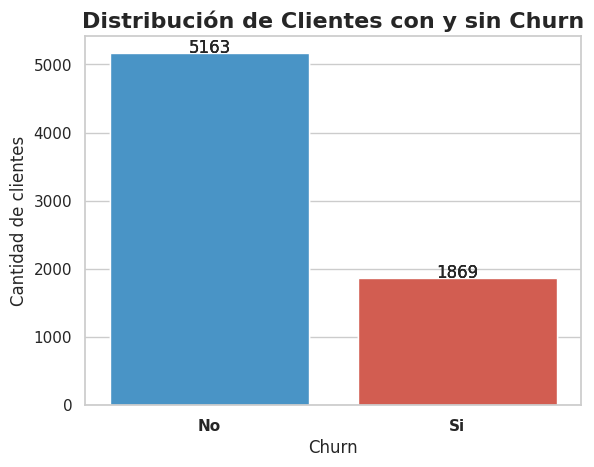

In [133]:
colors = ["#3498db", "#e74c3c"]  # Azul y rojo
sns.countplot(x='Churn', data=df)
sns.countplot(x='Churn', data=df, palette=colors)
ax = sns.countplot(x='Churn', data=df, palette=colors)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, int(height), ha="center", fontsize=12)
plt.title('Distribución de Clientes con y sin Churn', fontsize=16, weight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.xticks([0,1], ['No', 'Si'],weight='bold')
plt.show()
# Estilo de gráficos
sns.set(style="whitegrid")

📌 Churn **POR TIPO DE CONTRATO**

<Figure size 800x400 with 0 Axes>

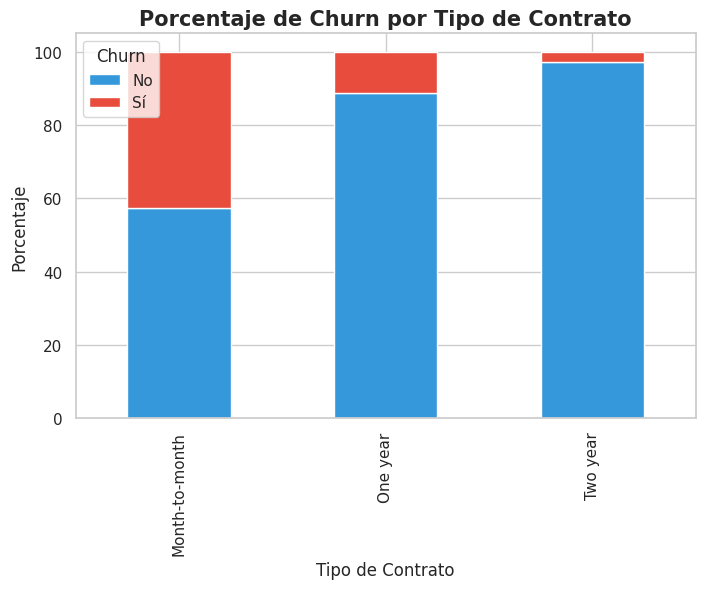

In [127]:
plt.figure(figsize=(8,4))
ct = pd.crosstab(df['account_Contract'], df['Churn'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, color=colors, figsize=(8, 5))
plt.title("Porcentaje de Churn por Tipo de Contrato", fontsize=15,weight='bold')
plt.ylabel("Porcentaje")
plt.xlabel("Tipo de Contrato")
plt.legend(title="Churn", labels=["No", "Sí"])



📌 Churn vs Tenure **(ANTIGUEDAD)**

Text(0, 0.5, 'Frecuencia')

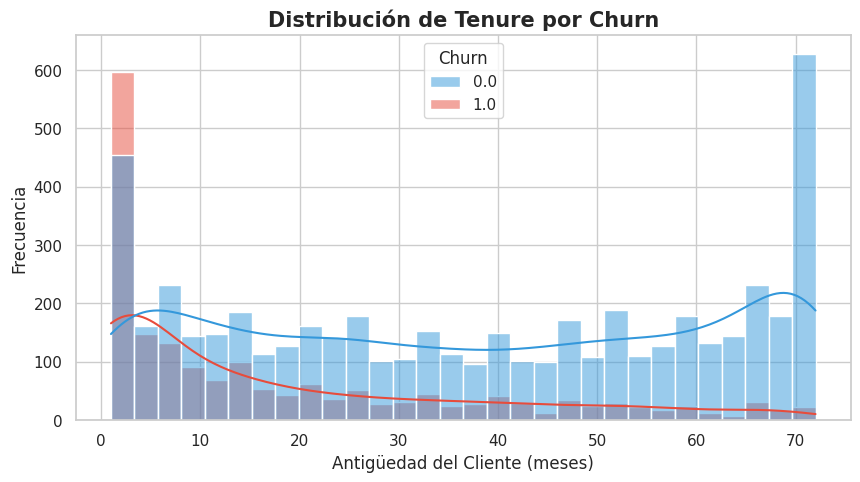

In [129]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='customer_tenure', hue='Churn', kde=True, palette=colors, bins=30)
plt.title("Distribución de Tenure por Churn", fontsize=15, weight='bold')
plt.xlabel("Antigüedad del Cliente (meses)")
plt.ylabel("Frecuencia")



📌 **CARGOS MENSUALES** vs churn

<ipython-input-132-3558762295>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df, palette=colors)


Text(0, 0.5, 'Cargos Mensuales ($)')

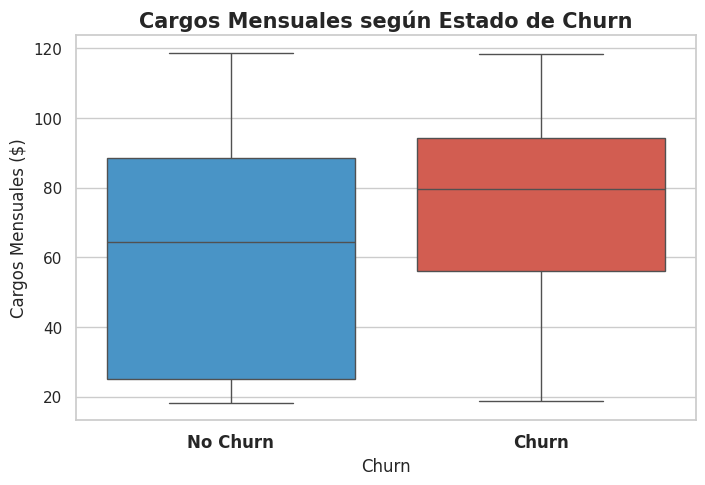

In [132]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df, palette=colors)
plt.title("Cargos Mensuales según Estado de Churn", fontsize=15,weight='bold')
plt.xticks([0, 1], ['No Churn', 'Churn'], fontsize=12,weight='bold')
plt.ylabel("Cargos Mensuales ($)", fontsize=12)


# 🔍 INSIGHTS INICIALES

In [91]:
print("🔍 Clientes con contrato mensual presentan mayor evasión.")
print("🔍 Mayor churn en clientes con menos de 12 meses de antigüedad.")
print("🔍 Los cargos mensuales más altos se asocian con mayor probabilidad de churn.")

🔍 Clientes con contrato mensual presentan mayor evasión.
🔍 Mayor churn en clientes con menos de 12 meses de antigüedad.
🔍 Los cargos mensuales más altos se asocian con mayor probabilidad de churn.


#📄Informe final

# 🧾 Resumen Ejecutivo

Telecom X enfrenta una creciente tasa de abandono de clientes (churn). Se realizó un análisis exploratorio sobre un conjunto de datos entregado por la empresa para identificar patrones asociados al abandono y preparar los datos para su uso en modelos predictivos.

Este informe presenta los hallazgos clave obtenidos tras el tratamiento y análisis de los datos, incluyendo visualizaciones con diferentes estilos para facilitar la interpretación desde distintas perspectivas.

📌 Principales Insights

Contrato mensual = alto riesgo de churn

Antigüedad baja = riesgo elevado de abandono

Altos cargos mensuales → mayor churn

Segmentos como clientes nuevos con servicios costosos y sin contrato fijo representan el perfil crítico.

# **Recomendaciones**

 - Diseñar estrategias de retención en los primeros meses del cliente.

 - Incentivar contratos de mayor duración con descuentos o beneficios exclusivos.

- Ofrecer planes flexibles y diferenciados para clientes con alto cargo mensual.